In [1]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.metrics import mean_squared_error
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
from times_series_workflow import *
from clean_data import clean
import pandas_ta as ta

2023-06-09 18:06:15.677000: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-09 18:06:16.978645: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-09 18:06:16.978813: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-06-09 18:06:17.154413: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-06-09 18:06:18.908279: W tensorflow/stream_executor/platform/de

In [2]:
#loading data
data=pd.read_csv("data/technical analysis/ta_btc.csv")

data.drop("Unnamed: 0", axis=1, inplace=True)

data = data.dropna().copy()

data=data.set_index('open_time')

X=data.drop(columns=["close"])
y=data["close"]



In [3]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras.layers import Masking
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import optimizers, metrics
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.layers import LSTM

In [4]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scale the data to be in the range (0, 1)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the data to be compatible with LSTM (number of samples, timesteps, features)
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

In [12]:
def init_model(X_train, y_train):
    # 1 - RNN architecture
    # ======================
    model = Sequential()

    ## 1.1 - Recurrent Layer
    model.add(LSTM(64, activation='tanh', return_sequences=True, kernel_regularizer=L1L2(l1=0.05, l2=0.05),
                   input_shape=(X_train.shape[1], 1)))

    ## 1.2 - Predictive Dense Layers
    model.add(LSTM(64, activation='tanh'))  # Agregar otra capa LSTM antes de la capa Dense

    # Salida lineal de una dimensión
    model.add(Dense(1, activation='linear'))

    # 2 - Compiler
    # ======================
    adam = optimizers.Adam(learning_rate=0.02)
    model.compile(loss='mse', optimizer=adam, metrics=["mae"])

    return model









#Early stopping
from tensorflow import keras
from keras.callbacks import EarlyStopping

def fit_model(model, verbose=1):

    # $CHALLENGIFY_BEGIN
    es = EarlyStopping(monitor = "val_loss",
                      patience = 3,
                      mode = "min",
                      restore_best_weights = True)

    print(X_train.shape)
    history = model.fit(X_train, y_train,
                        shuffle = False,
                        batch_size = 32,
                        epochs = 50,
                        callbacks = [es],
                        verbose = verbose)

    return model, history


# 1 - Initialising the RNN model
# ====================================

model = init_model(X_train, y_train)
model.summary()
adam = optimizers.Adam(learning_rate=0.02)    
#model.compile(loss='mse', optimizer=adam, metrics=["mae"])
model.compile()

# 2 - Training
# ====================================
model, history = fit_model(model)


# Evaluate the model on the test set
loss = model.evaluate(X_test_reshaped, y_test)

# Make predictions on the test set
predictions = model.predict(X_test_reshaped)

print("Loss:", loss)
print("Predictions:", predictions)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 22, 64)            16896     
                                                                 
 lstm_5 (LSTM)               (None, 64)                33024     
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 49,985
Trainable params: 49,985
Non-trainable params: 0
_________________________________________________________________
(3772, 22)
Epoch 1/50
118/118 [==============================] - 2s 3ms/step - loss: 0.3670
Epoch 2/50
118/118 [==============================] - 0s 2ms/step - loss: 0.0087
Epoch 3/50
118/118 [==============================] - 0s 2ms/step - loss: 0.0064
Epoch 4/50
118/118 [==============================] - 0s 2ms/s

In [24]:
model.score(X_test_reshaped, y_test)

AttributeError: 'Sequential' object has no attribute 'score'

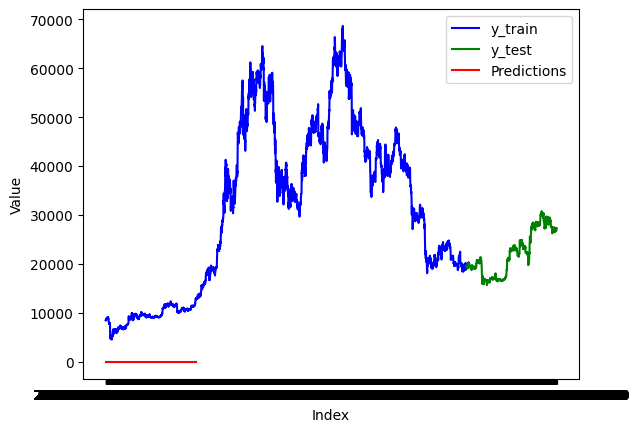

In [18]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()

# Graficar y_train en color azul
ax.plot(y_train, color='blue', label='y_train')

# Graficar y_test en color verde
ax.plot(y_test, color='green', label='y_test')

# Graficar las predicciones en color rojo
ax.plot(predictions, color='red', label='Predictions')

# Añadir leyenda y etiquetas
ax.legend()
ax.set_xlabel('Index')
ax.set_ylabel('Value')
plt.show()


In [5]:
# import keras
# def init_model_2(input_shape):
#     inputs = keras.Input(shape=input_shape)
#     hidden = keras.layers.LSTM(64)(inputs)
#     output = keras.layers.Dense(1)(hidden)
#     model = keras.Model(inputs=inputs, outputs=output)
#     return model

In [10]:
from tensorflow import keras
from keras.callbacks import EarlyStopping
def fit_model(model, verbose=1):

    # $CHALLENGIFY_BEGIN
    es = EarlyStopping(monitor = "val_loss",
                      patience = 3,
                      mode = "min",
                      restore_best_weights = True)

    print(X_train.shape)
    history = model.fit(X_train, y_train,
                        shuffle = False,
                        batch_size = 32,
                        epochs = 50,
                        callbacks = [es],
                        verbose = verbose)

    return model, history

In [1]:
#X_train=X_train.reshape(3772,22,1)
model = init_model((X_train_reshaped.shape[1],1))
model.summary()
adam = optimizers.Adam(learning_rate=0.02)    
model.compile(loss='mse', optimizer=adam)


# 2 - Training
# ====================================
model, history = fit_model(model)


NameError: name 'init_model' is not defined